# Transferring data from Photo Receipts into an Excel File

### Table of Contents:
#### 1. Introduction
#### 2. Installing an Optical Character Recognition Software (OCR)
#### 3. Loading the text of the photo into your notebook
#### 4. Extracting the Data
    4.1 Extracting Company Name
    4.1 Extracting Total Value
    4.1 Extracting Date
    4.1 Extracting Time
#### 5. Creating DataFrame from Extracted Data
#### 6. Saving the DataFrame into an Excel File
#### 7. Processing All Photos From a Directory Into a DataFrame
#### 8. Save the Directory Extracted Data into an Excell File
#### 9. Converting All Photos to PDF and Organizing in New Directories
#### 10. Conclusion

## 1. Introduction

Many companies need to track their spending by inputting data from receipts into an Excel file and creating tables to manage their expenditure. Manually typing the required information from receipts into Excel can be a time-consuming process. Using Python as a tool to automate this process is a smart move that can save you time, allowing you to focus on other tasks.

In this project, I have selected some of my own receipts from supermarket shopping to demonstrate how this process works and how you can apply these steps to automate this process for your work or personal expenses.

## 2. Installing an Optical Character Recognition Software (OCR)

The first thing you need to do is install OCR software to convert images to text (photos into text). For this project, I installed Tesseract OCR, an open-source OCR.

If you are using Windows, you can download it from this link: https://github.com/UB-Mannheim/tesseract/wiki

During the installation, there is an option to add Tesseract to the PATH. If you miss this part, you can do it manually.

To test the installation and ensure proper PATH configuration, open a command prompt and type: tesseract --version. If Tesseract is correctly added to the PATH, this command should display the Tesseract version information.



Now, lets test your tesseract using the command prompt. First, type the directory path:



Now that Tesseract is inside your directory, type tesseract "name_of_file.format" output_name, in this case, "img1.text".



The text file was saved in the same directory of your image.

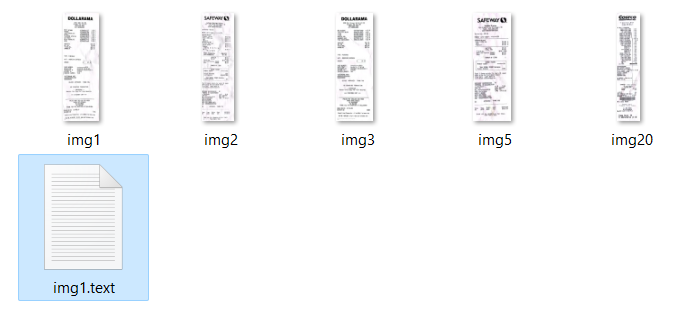

## 3. Loading the text of the photo to your Jupyter Notebook

Let's move on to Python now.

In [9]:
%pip install pytesseract

Next step is to chose one photo and use the pytesseract package to load the text extracted from the photo into your jupyter notebook.

In [3]:
import pytesseract
from PIL import Image

# Define the file path of your image
file_path = r"C:\Users\ricar\Documents\Data Science Studies\PYTHON\13. Receipts - PDF to Excel\images\img2.jpeg"

# Open the image using PIL
img = Image.open(file_path)

# Use pytesseract to extract text from the image
extracted_text = pytesseract.image_to_string(img)

# Print the extracted text
print(extracted_text)

SAFEWAY @9,

Safeway Downtown Calgary
813 - 11 Avenue SW Calgary AB
Phone: 403.264.1375
GST# 895588788RT0001

Served by: SCO 24

Member card number: **x«x%«*710

GROCERY

Hickory Sticks $4.99 GC
Milk 3.25% Jug $4.99 C¢
+EHC $0.05 R
+Deposit $0.25 R
PRODUCE
Lettuce Red Leaf $2.99 C
Onions Green $1.99 C
Bananas $1.77 C
1.020 kg @ $1.74 / kg
Garlic $1.58 C
20 1/ $0.79
POINTS Redemption ~1000 PTS
CASH Redemption -$10.00
SUBTOTAL SSB.
5% GST $0.25
TOTAL $8.86
American Express TENDER $8.86
Cash CHANGE $0.00
NUMBER OF ITEMS 7
___SCENE* POINTS 5
| Member number: XRKRERKTAO,
| Points Redeemed 1000 |
| Confirmation 17109757990
| Your SCENE+ POINTS Balance
| Scene+ Balance 293
Earn 2 Scene+ points for every $1 spent
when using the Scotiabank Scene+
Visa Card. Learn niore at
scotiabank .com/2xthepoints
MERCHANT 932358359210 RF
TERMINAL ID $02225582824
xx Purchase ax § 8.86
CARD AM RCPT 6493000
NO, xxxKKxxeKHRBOLD RESP 000
DATE 03/20/2024 TIME 17:03:29
AUTH # 451689
REF# 001778149
APPL.SCOTTABANK A

## 4. Extracting the data

As a way of testing your progress, I would recommend extracting the data one by one. Choose one piece of data that you want to extract from the text and then add the others step by step.

In [7]:
import pandas as pd
import re

### 4.1. Extracting Company Name

As all my receipts have the company name as the first word in the text, a simple .split[0] function retrieves me the first word.

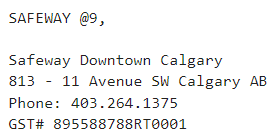

In [384]:
# Extract company name (first word in the text)
company_name = extracted_text.split()[0]

print(company_name)

SAFEWAY


Let's try a different photo:

In [5]:
# Define the file path of your image
file_path = r"C:\Users\ricar\Documents\Data Science Studies\PYTHON\13. Receipts - PDF to Excel\images\img20.jpg"

# Open the image using PIL
img = Image.open(file_path)

# Use pytesseract to extract text from the image
extracted_text = pytesseract.image_to_string(img)

# Extract company name (first word in the text)
company_name = extracted_text.split()[0]

print(company_name)

COSTU'O


At this stage, you can see that the quality of the photo and receipt is very important for retrieving the information without any problems.

PHOTO:

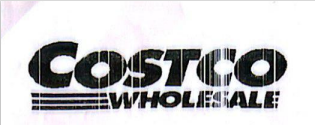

Extracted name:

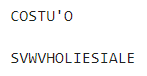

### 4.2. Extracting Total

Now, I'll use regular expressions to extract the necessary data. This is the section where I can locate the value I need:

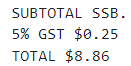

So, I'll employ regular expressions to identify a pattern:
- The exact word "TOTAL"
- There might be one or more spaces after "TOTAL"
- There is a "$" character
- The value consists of one or more digits and includes a decimal point followed by two digits
- The parentheses in my regular expression define the group I want.

In [10]:
# Define the file path of your image
file_path = r"C:\Users\ricar\Documents\Data Science Studies\PYTHON\13. Receipts - PDF to Excel\images\img2.jpeg"

# Open the image using PIL
img = Image.open(file_path)

# Use pytesseract to extract text from the image
extracted_text = pytesseract.image_to_string(img)

# Extract total following the pattern above
total_match = re.search(r'\bTOTAL\s*\$(\d+(?:\.\d{2}))', extracted_text).group(1)

print(total_match)

8.86


The pattern above is not the only one that I have.

img1: 

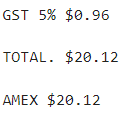

img3:

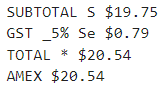

In these two cases, there is a character between TOTAL and \$. We can use a regular expression that matches both cases.


In [23]:
# Define the file path of your image
file_path = r"C:\Users\ricar\Documents\Data Science Studies\PYTHON\13. Receipts - PDF to Excel\images\img1.jpeg"
# Open the image using PIL
img = Image.open(file_path)
# Use pytesseract to extract text from the image
extracted_text = pytesseract.image_to_string(img)

# Include [^$]? in case there is a character between TOTAL and $
total_match2 = re.search(r'\bTOTAL\s*[^$]\s*\$(\d+\.\d{2})', extracted_text).group(1)
print(total_match2)

20.12


#### What if I had a problem withdrawing the TOTAL?

Photo:

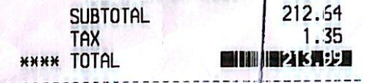

As you can see from the text below, Tesseract didn't recognize the TOTAL value for this receipt. This occurred due to the quality of the photo/receipt. Additionally, the $ sign is not present in this case.

Result:

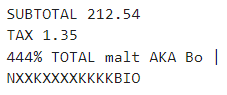

#### Getting the sum of SUBTOTAL and TAX values

In this case, I'll calculate the sum of the SUBTOTAL and TAX values, which is another way of obtaining the TOTAL value. First, I'll use the same regular expression to retrieve these values, and then I'll need to convert the extracted result into a float.

In [261]:
# Extract subtotal value - this time, the parentheses only identify one group
subtotal_match = re.search(r'SUBTOTAL\s+\s*(\d+(?:\.\d{2})?)', extracted_text).group(1)
print(subtotal_match)

212.54


In [105]:
# Extract tax value - this time, the parentheses only identify one group
tax_match = re.search(r'TAX\s+\s*(\d+(?:\.\d{2})?)', extracted_text).group(1)
print(tax_match)

1.35


In [106]:
# Convert values to float and sum them
total_sum = float(subtotal_match) + float(tax_match)
print(total_sum)

213.89


#### Using if/else function to put all togheter

We have identified three different cases for extracting the TOTAL value from receipts:
- TOTAL plus \$ This case involves the TOTAL value directly followed by a dollar sign.
- TOTAL, a random character, and \$: In this case, there is an additional random character between TOTAL and the dollar sign.
- TOTAL without \$: Here, the TOTAL value does not have a dollar sign after it.

To handle these cases, we will use if/else statements along with different regular expressions in Python. These statements will check each case and execute the appropriate code block to extract the TOTAL value.

In [24]:
# Define the file path of your image
file_path = r"C:\Users\ricar\Documents\Data Science Studies\PYTHON\13. Receipts - PDF to Excel\images\img20.jpg"
# Open the image using PIL
img = Image.open(file_path)
# Use pytesseract to extract text from the image
extracted_text = pytesseract.image_to_string(img)

# Extract total value in dollars (text after 'TOTAL' and '$' followed by numbers and optional decimals)
total_match = re.search(r'\bTOTAL\s*\$(\d+(?:\.\d{2}))', extracted_text)
if total_match:
    total_value = float(total_match.group(1))
else: 
    total_match2 = re.search(r'\bTOTAL\s*[^$]\s*\$(\d+\.\d{2})', extracted_text)
    if total_match2:
        total_value = float(total_match2.group(1))
    else: 
        # Extract subtotal value - this time, the parentheses only identify one group
        subtotal_match = re.search(r'SUBTOTAL\s+\s*(\d+(?:\.\d{2})?)', extracted_text)
        # Extract tax value - this time, the parentheses only identify one group
        tax_match = re.search(r'TAX\s+\s*(\d+(?:\.\d{2})?)', extracted_text)
        if subtotal_match and tax_match:
            subtotal = float(subtotal_match.group(1))
            tax = float(tax_match.group(1))
            # Convert values to float and sum them
            total_value = subtotal + tax

print(total_value)

213.89


Extracted text:

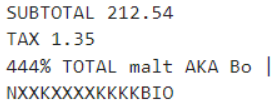

## 4.3. Extracting Date 

The receipts I used had three variations of date formats:
- MM/DD/YYYY



- YYYY/MM/DD - 2024/03/20



- YYYY-MM-DD - 2024-03-20

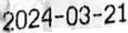

#### First pattern - MM/DD/YYYY:

In [27]:
# Define the file path of your image
file_path = r"C:\Users\ricar\Documents\Data Science Studies\PYTHON\13. Receipts - PDF to Excel\images\img1.jpeg"
# Open the image using PIL
img = Image.open(file_path)
# Use pytesseract to extract text from the image
extracted_text = pytesseract.image_to_string(img)

# Extract date using MM/DD/YYYY format
date_match = re.search(r'(\d{2}/\d{2}/\d{4})\s', extracted_text).group(1).replace('/', '-')  # Convert '/' to '-'

print(date_match)

03-20-2024


#### Second pattern YYYY/MM/DD: 
Find YYYY/MM/DD and rearrange it to MM/DD/YYYY:

In [29]:
# Define the file path of your image
file_path = r"C:\Users\ricar\Documents\Data Science Studies\PYTHON\13. Receipts - PDF to Excel\images\img20.jpg"
# Open the image using PIL
img = Image.open(file_path)
# Use pytesseract to extract text from the image
extracted_text = pytesseract.image_to_string(img)

# If MM/DD/YYYY format is not found, try YYYY/MM/DD format
date2_match = re.search(r'(\d{4}/\d{2}/\d{2})\s+', extracted_text).group(1)
# Rearrange the date to 'MM/DD/YYYY'
year, month, day = date2_match.split('/')
date2_match = f"{month}-{day}-{year}"
    
print(date2_match)

03-16-2024


#### Thrid pattern YYYY-MM-DD:
Find YYYY-MM-DD and rearrange it to MM-DD-YYYY

In [30]:
# Define the file path of your image
file_path = r"C:\Users\ricar\Documents\Data Science Studies\PYTHON\13. Receipts - PDF to Excel\images\img1.jpeg"
# Open the image using PIL
img = Image.open(file_path)
# Use pytesseract to extract text from the image
extracted_text = pytesseract.image_to_string(img)

# If both formats are not found, try YYYY-MM-DD format
date3_match = re.search(r'(\d{4}-\d{2}-\d{2})\s+', extracted_text).group(1)     
# Rearrange the date to 'MM/DD/YYYY'
year, month, day = date3_match.split('-')
date3_match = f"{month}-{day}-{year}"

print(date3_match)

03-21-2024


Now, we put all these together to compose the code for extracting the date:

In [231]:
# Define the file path of your image
file_path = r"C:\Users\ricar\Documents\Data Science Studies\PYTHON\13. Receipts - PDF to Excel\images\img1.jpeg"
# Open the image using PIL
img = Image.open(file_path)
# Use pytesseract to extract text from the image
extracted_text = pytesseract.image_to_string(img)

# Extract date using MM/DD/YYYY format
date_match = re.search(r'(\d{2}/\d{2}/\d{4})\s', extracted_text)
if date_match:
    # If date is found in MM/DD/YYYY format
    date = date_match.group(1).replace('/', '-')  # Convert '/' to '-'
else:
    # If MM/DD/YYYY format is not found, try YYYY/MM/DD format
    date2_match = re.search(r'(\d{4}/\d{2}/\d{2})\s+', extracted_text)    
    if date2_match:
        # If date is found in YYYY/MM/DD format
        date = date2_match.group(1)
        # Rearrange the date to 'MM/DD/YYYY'
        year, month, day = date.split('/')
        date = f"{month}-{day}-{year}"
    else:
        # If both formats are not found, try YYYY-MM-DD format
        date3_match = re.search(r'(\d{4}-\d{2}-\d{2})\s+', extracted_text)        
        if date3_match:
            # If date is found in YYYY-MM-DD format
            date = date3_match.group(1)
            # Rearrange the date to 'MM/DD/YYYY'
            year, month, day = date.split('-')
            date = f"{month}-{day}-{year}"
        else:
            # If no date is found in any of the formats
            date = "Date not found"

print(date)

03-21-2024


## 4.4. Extracting time

To extract the time, we create a regular expression with the hour format hh:mm:ss and extract only the hour and minutes (hh:mm).

In [233]:
# Define the file path of your image
file_path = r"C:\Users\ricar\Documents\Data Science Studies\PYTHON\13. Receipts - PDF to Excel\images\img1.jpeg"
# Open the image using PIL
img = Image.open(file_path)
# Use pytesseract to extract text from the image
extracted_text = pytesseract.image_to_string(img)

# Extract time and consider only HH:MM as group 1
time = re.search(r'(\d{2}:\d{2}):\d{2}', extracted_text).group(1)
print(time_match)

18:01


##  5. Creating Dataframe from extracted data

Now that we have all the necessary codes, let's organize the results in a structured format using a DataFrame in Pandas.

To achieve this, we will:
- Consolidate all the components we have developed so far.
- Utilize a dictionary to store the data retrieved from our code and structure it in a Pandas DataFrame named df.

In [25]:
# Define the file path of your image
file_path = r"C:\Users\ricar\Documents\Data Science Studies\PYTHON\13. Receipts - PDF to Excel\images\img2.jpeg"
# Open the image using PIL
img = Image.open(file_path)
# Use pytesseract to extract text from the image
extracted_text = pytesseract.image_to_string(img)

# Extract company name (first word in the text)
company_name = extracted_text.split()[0]

# Extract total value in dollars (text after 'TOTAL' and '$' followed by numbers and optional decimals)
total_match = re.search(r'\bTOTAL\s*\$(\d+(?:\.\d{2}))', extracted_text)
if total_match:
    total_value = float(total_match.group(1))
else: 
    total_match2 = re.search(r'\bTOTAL\s*[^$]\s*\$(\d+\.\d{2})', extracted_text)
    if total_match2:
        total_value = float(total_match2.group(1))
    else: 
        # Extract subtotal value - this time, the parentheses only identify one group
        subtotal_match = re.search(r'SUBTOTAL\s+\s*(\d+(?:\.\d{2})?)', extracted_text)
        # Extract tax value - this time, the parentheses only identify one group
        tax_match = re.search(r'TAX\s+\s*(\d+(?:\.\d{2})?)', extracted_text)
        if subtotal_match and tax_match:
            subtotal = float(subtotal_match.group(1))
            tax = float(tax_match.group(1))
            # Convert values to float and sum them
            total_value = subtotal + tax

# Extract date using MM/DD/YYYY format
date_match = re.search(r'(\d{2}/\d{2}/\d{4})\s', extracted_text)
if date_match:
    # If date is found in MM/DD/YYYY format
    date = date_match.group(1).replace('/', '-')  # Convert '/' to '-'
else:
    # If MM/DD/YYYY format is not found, try YYYY/MM/DD format
    date2_match = re.search(r'(\d{4}/\d{2}/\d{2})\s+', extracted_text)    
    if date2_match:
        # If date is found in YYYY/MM/DD format
        date = date2_match.group(1)
        # Rearrange the date to 'MM/DD/YYYY'
        year, month, day = date.split('/')
        date = f"{month}-{day}-{year}"
    else:
        # If both formats are not found, try YYYY-MM-DD format
        date3_match = re.search(r'(\d{4}-\d{2}-\d{2})\s+', extracted_text)        
        if date3_match:
            # If date is found in YYYY-MM-DD format
            date = date3_match.group(1)
            # Rearrange the date to 'MM/DD/YYYY'
            year, month, day = date.split('-')
            date = f"{month}-{day}-{year}"
        else:
            # If no date is found in any of the formats
            date = "Date not found"

# Extract time and considering HH:MM format
time = re.search(r'\s+(\d{2}:\d{2}):\d{2}', extracted_text).group(1)

# Create a Pandas DataFrame to store the information
df = pd.DataFrame({'Company Name': [company_name],
                    'Total Value ($)': [total_value],
                    'Date': [date],
                    'Time': [time]})

# Print the DataFrame
print(df)

  Company Name  Total Value ($)        Date   Time
0      SAFEWAY             8.86  03-20-2024  17:03


## 6. Saving the dataframe into an Excel file

Install openpyxl, a library used for opening, reading and writing Excel files.

In [137]:
%pip install openpyxl

Note: you may need to restart the kernel to use updated packages.


In [238]:
# Define the output Excel file path
output_file_path = r"C:\Users\ricar\Documents\Data Science Studies\PYTHON\13. Receipts - PDF to Excel\receipt_info.xlsx"

# Save the DataFrame to an Excel file
df.to_excel(output_file_path, index=False)

print(f"Data saved to Excel file: {output_file_path}")

Data saved to Excel file: C:\Users\ricar\Documents\Data Science Studies\PYTHON\13. Receipts - PDF to Excel\receipt_info.xlsx


## 7. Processing all photos from a directory into dataframe

Now, we want to create a code that processes all the photos in the directory, instead of having to do it photo by photo.

Import os module to get a list of all the files in your directory

In [140]:
import os

Let's define a function that initiate empty variables that will be used to store the extracted information from each photo.

In [410]:
# Define a function - extract_info
def extract_info(extracted_text):
    # Initialize variables to store extracted information
    company_name = ""
    total_value = ""
    date = ""
    time = ""
    
    # Extract company name (first word in the text)
    company_name = extracted_text.split()[0]

    # Extract total value in dollars (text after 'TOTAL' and '$' followed by numbers and optional decimals)
    total_match = re.search(r'\bTOTAL\s*\$(\d+(?:\.\d{2}))', extracted_text)
    if total_match:
        total_value = float(total_match.group(1))
    else: 
        total_match2 = re.search(r'\bTOTAL\s*[^$]\s*\$(\d+\.\d{2})', extracted_text)
        if total_match2:
            total_value = float(total_match2.group(1))
        else: 
            # Extract subtotal value - this time, the parentheses only identify one group
            subtotal_match = re.search(r'SUBTOTAL\s+\s*(\d+(?:\.\d{2})?)', extracted_text)
            # Extract tax value - this time, the parentheses only identify one group
            tax_match = re.search(r'TAX\s+\s*(\d+(?:\.\d{2})?)', extracted_text)
            if subtotal_match and tax_match:
                subtotal = float(subtotal_match.group(1))
                tax = float(tax_match.group(1))
                # Convert values to float and sum them
                total_value = subtotal + tax
    
    # Extract date using MM/DD/YYYY format
    date_match = re.search(r'(\d{2}/\d{2}/\d{4})\s', extracted_text)
    if date_match:
        # If date is found in MM/DD/YYYY format
        date = date_match.group(1).replace('/', '-')  # Convert '/' to '-'
    else:
        # If MM/DD/YYYY format is not found, try YYYY/MM/DD format
        date2_match = re.search(r'(\d{4}/\d{2}/\d{2})\s+', extracted_text)    
        if date2_match:
            # If date is found in YYYY/MM/DD format
            date = date2_match.group(1)
            # Rearrange the date to 'MM/DD/YYYY'
            year, month, day = date.split('/')
            date = f"{month}-{day}-{year}"
        else:
            # If both formats are not found, try YYYY-MM-DD format
            date3_match = re.search(r'(\d{4}-\d{2}-\d{2})\s+', extracted_text)        
            if date3_match:
                # If date is found in YYYY-MM-DD format
                date = date3_match.group(1)
                # Rearrange the date to 'MM/DD/YYYY'
                year, month, day = date.split('-')
                date = f"{month}-{day}-{year}"
            else:
                # If no date is found in any of the formats
                date = "Date not found"

    # Extract time and consider only HH:MM as group 1
    time = re.search(r'\s+(\d{2}:\d{2}):\d{2}', extracted_text).group(1)
    
    # Return the extracted information as a tuple
    return company_name, total_value, date, time

Now, all the data extraction we did so far is saved inside extract_info and we will use this function in our loop below.

In [411]:
# Specify the directory containing the images
image_dir = r"C:\Users\ricar\Documents\Data Science Studies\PYTHON\13. Receipts - PDF to Excel\images"

# Get a list of all files in the directory
image_files = os.listdir(image_dir)

# Define an empty list to store DataFrames for each image
dfs = []

# Loop through each image file
for file_name in image_files:
    # Skip non-jpg files (OPTIONAL)
    if not file_name.endswith('.jpg' or 'jpeg'):
        pass
    
    # Open the image using PIL
    img = Image.open(os.path.join(image_dir, file_name))
        
    # Use pytesseract to extract text from the image
    extracted_text = pytesseract.image_to_string(img)

    # Extract information from the extracted text
    company_name, total_value, date, time = extract_info(extracted_text)
    
    # Create a DataFrame for the extracted information
    df = pd.DataFrame({'Company Name': [company_name],
                       'Total Value ($)': [total_value],
                       'Date': [date],
                       'Time': [time]})

    # Append the DataFrame to the list
    dfs.append(df)

# Concatenate all DataFrames in the list 'dfs' into a single DataFrame
result_df = pd.concat(dfs, ignore_index=True)

print(result_df)

  Company Name  Total Value ($)        Date   Time
0    DOLLARAMA            20.12  03-21-2024  16:58
1      SAFEWAY             8.86  03-20-2024  17:03
2      COSTU'O           213.89  03-16-2024  11:40
3    DOLLARAMA            20.54  03-15-2024  17:04
4      SAFEWAY             5.29  03-14-2024  18:01


## 8. Save all extracted data into an Excel file

In [399]:
# Define the output Excel file path
output_file_path = r"C:\Users\ricar\Documents\Data Science Studies\PYTHON\13. Receipts - PDF to Excel\receipt_info.xlsx"

# Save the DataFrame to an Excel file
result_df.to_excel(output_file_path, index=False)

print(f"Data saved to Excel file: {output_file_path}")

Data saved to Excel file: C:\Users\ricar\Documents\Data Science Studies\PYTHON\13. Receipts - PDF to Excel\receipt_info.xlsx


Below is a print of my Excel file:

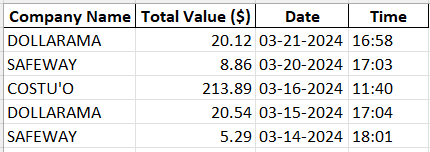

## 9. Converting all the images into PDF and Organizing in new directories

Another task you may need to complete is converting all the photos to PDF format, saving them with specific names, and organizing them into specific folders corresponding to their respective company names.

In [408]:
# Define the directory containing the images
image_dir = r"C:\Users\ricar\Documents\Data Science Studies\PYTHON\13. Receipts - PDF to Excel\images"

# Define the output directory for PDF receipts
pdf_output_dir = r"C:\Users\ricar\Documents\Data Science Studies\PYTHON\13. Receipts - PDF to Excel\pdf_receipts"

# Get a list of all files in the directory
image_files = os.listdir(image_dir)

# Create the output directory - if it already exists, it won't raise an error.
os.makedirs(pdf_output_dir, exist_ok=True)

# Loop through each image file
for file_name in image_files:
    img = Image.open(os.path.join(image_dir, file_name))
    extracted_text = pytesseract.image_to_string(img)
    # Use the defined function extract_info used before
    company_name, total_value, date, time = extract_info(extracted_text)

    # Create a directory for each company if it doesn't exist
    company_dir = os.path.join(pdf_output_dir, company_name)
    os.makedirs(company_dir, exist_ok=True)
    
    # Define the file name for the PDF using extracted information
    pdf_file_name = f"{date.replace('/', '-')} - {company_name} - {total_value}.pdf"
    pdf_file_path = os.path.join(company_dir, pdf_file_name)

    img.save(pdf_file_path, "PDF", resolution=100.0)
    
    print(f"Image converted to PDF: {pdf_file_name}, and saved into directory: {company_name}")

Image converted to PDF: 03-21-2024 - DOLLARAMA - 20.12.pdf, and saved into directory: DOLLARAMA
Image converted to PDF: 03-20-2024 - SAFEWAY - 8.86.pdf, and saved into directory: SAFEWAY
Image converted to PDF: 03-16-2024 - COSTU'O - 213.89.pdf, and saved into directory: COSTU'O
Image converted to PDF: 03-15-2024 - DOLLARAMA - 20.54.pdf, and saved into directory: DOLLARAMA
Image converted to PDF: 03-14-2024 - SAFEWAY - 5.29.pdf, and saved into directory: SAFEWAY


Directories created:

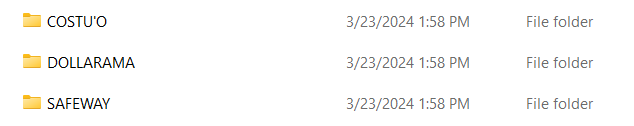

## 10. Conclusion

In conclusion, this project shows the power of Python to streamline the process of tracking expenses from receipts. We were able to extract data from receipts and create Excel sheets to manage expenditures. Additionally, the automatic creation of directories for storing the PDF versions of the receipts adds efficiency to the process.

This demonstration with supermarket shopping receipts only partially showcases the efficiency gained through automation. Consider the scenario of processing 100 receipts each month.

Overall, Python offers immense value in optimizing tasks, allowing individuals and businesses to allocate their time and resources more effectively toward higher-priority activities.